# Bayesian Inverse Runtime Calculator for Rates (Adidas) R Colab




### 1. Version Notes
This is a colab specific version. <br>
The version supports two and three variants (including control). <br>
<b>Runtime Preparation:</b><br>
We need to collect a **35 Days** sample of total visits and total conversions to the segment.<br>
The information collected goes in as an input to the form in section 2. <br>

In [5]:
library("tidyverse")
library("parallel")
#source("BayesRunInvMDE_Rates.R")
source("https://gist.githubusercontent.com/benschipper/f8927318eff579e46e12888a4b296b6b/raw/c343b6d173fd6f378947c4c72a2dcf5a23489d87/BayesRunInvMDE_Rates.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 2. Manual input
Key inputs for this form are sourced from an Adobe workspace. Link to a sample template is given below. <br> [Link to Adobe Workspace](https://www3.an.adobe.com/x/3_prh0i) <br>
*Visits_35Days -> 35 Days total sample collected*  <br>
*Conversions_35Days -> 35 Days total conversions*  <br>
*Number of Days -> Number of days experiment needs to run*  <br>
*Default value of Days is "7" and for "number of variants" it's "2" (including control). These may be changed by entering appropriate values against the respective user input controls below.*
<br>
*MDE_Precision -> One may wish to leave the default - in which case it is determined by the application itself*
<br>
#### **Carefully input the values for each variable **<br>
<i>The Page type / KPI/ Market variables are only for debugging/user reference and not mandatory for script execution. <br>
Visits_35Days, Conversions_35Days, Number_of_variants & Number of Days are mandatory user inputs.<i/>

For example:
ATP-4220, Sustainability combined PDP, Sustainability combined PDP > A2C ,ALL, **9560953** ,**379419**, **1**,**0.5**, **2**


In [6]:
## @title Manual Inputs
ATP_Test <- "ATP-6974-Sitewide Ranking rules AB Test - AU" #@param {type:"string"}
Page_Type <- "PLP" #@param {type:"string"}
Primary_KPI <- "PDP Views" #@param {type:"string"}
Market <- "AU" #@param {type:"string"}
Visits_35Days <-  573719#@param {type:"integer"}
Conversions_35Days <- 256894 #@param {type:"integer"}
Number_of_Days <-  7#@param {type:"number"}
MDE_Precision <-.1   #@param [" ", ".1", ".5"] {type:"raw"}
Number_of_Variants <- 2 #@param ["2", "3"] {type:"raw"}


## Manual Input cell
atp = ATP_Test #"ATP-3545"
pgt = Page_Type #'PLP to Cart Page'
kpi = Primary_KPI #'AOV'
Market = Market #'US Big 6 (Desktop)'
wks = Number_of_Days/7 #Weeks
inc = MDE_Precision
# ATP-4548 PLP to Cart
f1 = Visits_35Days #45811
f2 = Conversions_35Days

##---------- use c(0.5,0.7,0.8,1.0,1.3,1.5,1.8,2.0) for multiple MDEs --------------##
#mde= c(MDE) #c(2.0)
#cat(sprintf("Conversion Rate: \"%f\"\n", round(f2/f1,7)*100))
if (Number_of_Variants==3){
            hdi_bfc=0.9725
            nv = 3} else {
      hdi_bfc=0.95
      nv = 2}


#### **2.1 Optional code to override above Number of Days (Use only if having multiple values for days for inputs)**

In [7]:
##---------- use c(7,14,21,28,35) for multiple Days --------------##
# Uncomment this line if you want to provide multiple #days as input for a batch run.
 days = c(21,28,35,45,60)
## Subsequently uncomment the below line as well before running the cell
 wks = days/7
cat(sprintf("Conversion Rate: \"%f\"\n", round(f2/f1,7)*100))


#wks
# Uncomment the line below only if higher precision of the MDE estimate is necessary.
# inc = 0.05

Conversion Rate: "44.776970"


# 3. Perform calculations

In [8]:
system.time(sim_rope_1 <-
              crossing(wks  = wks,
                       power = c(0.8)) %>%
              mutate(results = map2_dbl(pgt=pgt,kpi=kpi,wks, power,inc=inc,hdi_mass=hdi_bfc, five_wk_sz=f1,
                                        five_wk_conv=f2,num_variants=nv,sim_power)))

Initmde: "0.004772"
 Initmde: "0.004133"
 Initmde: "0.003697"
 Initmde: "0.003260"
 Initmde: "0.002823"
 

   user  system elapsed 
417.918   2.614 238.022 

## 4. Display Tabular results

In [9]:
sim_rope_df <- data.frame(sim_rope_1) %>%
 rename(Expected_MDE=results, Num_Days = wks) %>%
 mutate(Test_name = atp, PageType = pgt, PrimaryKPI=kpi,Market=Market,fiveweeksize =f1,conversions=f2, mde = ceiling(Expected_MDE*1000)/10,
 SampleSize_per_variant = ceiling(wks*(f1/(nv*5))),Num_Days= round(Num_Days,1),Num_days= round(Num_Days*7)
)  %>%
 select(Test_name, PageType , PrimaryKPI,Market,Num_days,SampleSize_per_variant,mde)

sim_rope_df


Test_name,PageType,PrimaryKPI,Market,Num_days,SampleSize_per_variant,mde
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
ATP-6974-Sitewide Ranking rules AB Test - AU,PLP,PDP Views,AU,21,172116,4.3
ATP-6974-Sitewide Ranking rules AB Test - AU,PLP,PDP Views,AU,28,229488,3.8
ATP-6974-Sitewide Ranking rules AB Test - AU,PLP,PDP Views,AU,35,286860,3.4
ATP-6974-Sitewide Ranking rules AB Test - AU,PLP,PDP Views,AU,45,368820,3.0
ATP-6974-Sitewide Ranking rules AB Test - AU,PLP,PDP Views,AU,60,491760,2.6



---

*For Runtimes < 7 days the experiment still needs to be run for full 7 days* <br>
*For Runtimes > 7 days the actual Runtime_days value can be used as a guidance.* <br>
**Important**: *Before stopping an experiment the actual sample size per variant NEEDS to be reached.*

---


In [10]:
## Save a copy as csv
sim_df <- sim_rope_df %>%   add_row(Test_name=' ') %>%
   add_row(Test_name='For Runtimes < 7 days the experiment still needs to be run for full 7 days.') %>%
  add_row(Test_name='For Runtimes > 7 days the actual Runtime_days value can be used as a guidance.') %>%
  add_row(Test_name='Important: Before stopping an experiment the actual sample size per variant NEEDS to be reached.')

write_csv(sim_df,"ATP-6974.csv",na="")


---




*After running the cell contents above go to the "Files" Pane on the left where the .csv file can be located.*

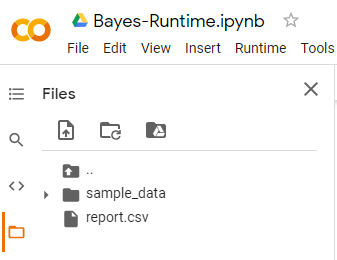

*It may then be downloaded locally (Right-click -> Download)*

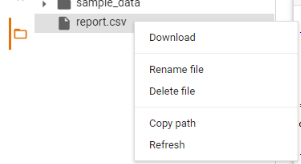

---

